# Check the brain and heart expression of network genes

Requires downloading GTEX data (https://gtexportal.org/home/datasets). Large files

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import pandas as pd
import random

# latex rendering of text in graphs
import matplotlib as mpl
mpl.rc('text', usetex = False)
mpl.rc('font', family = 'serif')

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

sns.set_style('white')

import sys

% matplotlib inline

# Load the ASD-CHD network genes

In [4]:
ASD_CHD_df = pd.read_excel('../../manuscript/tables_19_01/supplemental_tables.xlsx',sheet_name='ASD_CHD_network_genes')
ASD_CHD_df.index=ASD_CHD_df['gene']
print(len(ASD_CHD_df))
display(ASD_CHD_df.head())
ASD_CHD_genes = ASD_CHD_df['gene'].tolist()

# ASD_CHD_df = pd.read_csv('../../manuscript/tables_19_01/G_ASD_CHD_PCnetnodes_190117.tsv',sep='\t')
# # only keep z>3
# ASD_CHD_df = ASD_CHD_df[ASD_CHD_df['z_both']>3]
# ASD_CHD_genes = ASD_CHD_df['gene'].tolist()
# ASD_CHD_df.head()
# ASD_CHD_genes[0:5]

844


,gene,snv_indel_DECIPHERv9.25,snv_indel_DECIPHERv9.31,small_CNV_less1MB_DECIPHERv9.25,ASD_CHD_DNV,sum_damaging_variants,ASD_HC,CHD_HC,z_ASD,z_CHD,z_both,gtex_heart_percentile_exp,gtex_brain_percentile_exp
gene,,,,,,,,,,,,,
NAA15,NAA15,0.0,0.0,0.0,0.0,0.0,1,1,18.901197,20.892283,394.889167,0.733689,0.620830
PTEN,PTEN,1.0,1.0,0.0,1.0,2.0,1,1,16.395135,18.819067,308.541142,0.896062,0.894637
POGZ,POGZ,3.0,3.0,0.0,1.0,4.0,1,1,14.186540,14.641398,207.710787,0.908309,0.953178
KMT2C,KMT2C,0.0,0.0,0.0,1.0,1.0,1,1,13.462226,14.954173,201.316464,0.873100,0.908995
KDM5B,KDM5B,1.0,1.0,0.0,1.0,2.0,1,1,10.464431,13.490241,141.167693,0.677893,0.698533


In [5]:
len(ASD_CHD_genes)

844

# Load Gtex sample metadata

Filter by brain, heart samples, so we don't have to load full GTEX

In [6]:
gtex_meta = pd.read_csv('/Users/brinrosenthal/Documents/CCBB_tickets_data/GTEX/RNAseq/GTEx_Analysis_v8_Annotations_SampleAttributesDS.txt',
                       sep='\t')
gtex_meta.index=gtex_meta['SAMPID']
gtex_meta.head()

,SAMPID,SMATSSCR,SMCENTER,SMPTHNTS,SMRIN,SMTS,SMTSD,SMUBRID,SMTSISCH,SMTSPAX,...,SME1ANTI,SMSPLTRD,SMBSMMRT,SME1SNSE,SME1PCTS,SMRRNART,SME1MPRT,SMNUM5CD,SMDPMPRT,SME2PCTS
SAMPID,,,,,,,,,,,,,,,,,,,,,
GTEX-1117F-0003-SM-58Q7G,GTEX-1117F-0003-SM-58Q7G,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0003-SM-5DWSB,GTEX-1117F-0003-SM-5DWSB,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0003-SM-6WBT7,GTEX-1117F-0003-SM-6WBT7,NaN,B1,NaN,NaN,Blood,Whole Blood,0013756,1188.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0011-R10a-SM-AHZ7F,GTEX-1117F-0011-R10a-SM-AHZ7F,NaN,"B1, A1",NaN,NaN,Brain,Brain - Frontal Cortex (BA9),0009834,1193.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GTEX-1117F-0011-R10b-SM-CYKQ8,GTEX-1117F-0011-R10b-SM-CYKQ8,NaN,"B1, A1",NaN,7.2,Brain,Brain - Frontal Cortex (BA9),0009834,1193.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
gtex_meta_brain_heart = gtex_meta[gtex_meta['SMTS'].isin(['Brain','Heart'])]
print(len(gtex_meta_brain_heart))

gtex_samps_keep = gtex_meta_brain_heart.index.tolist()
gtex_meta_brain_heart['SMTS'].value_counts()



4467


Brain    3326
Heart    1141
Name: SMTS, dtype: int64

In [8]:
gtex_meta['SMTS'].value_counts()

Blood              3480
Brain              3326
Skin               2014
Esophagus          1582
Blood Vessel       1473
Adipose Tissue     1327
Heart              1141
Muscle             1132
Lung                867
Colon               821
Thyroid             812
Nerve               722
Breast              480
Testis              406
Stomach             381
Pancreas            360
Pituitary           301
Adrenal Gland       275
Prostate            262
Spleen              260
Liver               251
Bone Marrow         217
Ovary               195
Small Intestine     193
Salivary Gland      181
Vagina              173
Uterus              166
Kidney              104
Bladder              21
Cervix Uteri         19
Fallopian Tube        9
Name: SMTS, dtype: int64

# Try just reading the whole file

This chunk is parsing GTEX file... skip to next section if we don't need to do this.  Can just read in exp_brain_heart protein coding


In [10]:
# In the future just read in exp_gtex_brain_heart

exp_gtex_df = pd.read_csv('/Users/brinrosenthal/Documents/CCBB_tickets_data/GTEX/RNAseq/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_reads.gct.gz',
                         sep='\t',skiprows=2)
exp_gtex_df.head()

,Name,Description,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F-0426-SM-5EGHI,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F-0626-SM-5N9CS,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-1326-SM-5EGHH,GTEX-1117F-2426-SM-5EGGH,GTEX-1117F-2526-SM-5GZY6,...,GTEX-ZZPU-1126-SM-5N9CW,GTEX-ZZPU-1226-SM-5N9CK,GTEX-ZZPU-1326-SM-5GZWS,GTEX-ZZPU-1426-SM-5GZZ6,GTEX-ZZPU-1826-SM-5E43L,GTEX-ZZPU-2126-SM-5EGIU,GTEX-ZZPU-2226-SM-5EGIV,GTEX-ZZPU-2426-SM-5E44I,GTEX-ZZPU-2626-SM-5E45Y,GTEX-ZZPU-2726-SM-5NQ8O
0,ENSG00000223972.5,DDX11L1,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,1,1
1,ENSG00000227232.5,WASH7P,187,109,143,251,113,139,199,473,...,72,96,136,79,89,86,49,84,34,66
2,ENSG00000278267.1,MIR6859-1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ENSG00000243485.5,MIR1302-2HG,1,0,0,1,0,0,0,0,...,0,0,1,0,2,2,0,1,0,0
4,ENSG00000237613.2,FAM138A,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [11]:
gtex_samps_keep = list(np.intersect1d(gtex_samps_keep,exp_gtex_df.columns.tolist()))
print(len(gtex_samps_keep))
exp_gtex_brain_heart = exp_gtex_df[['Description']+gtex_samps_keep]
exp_gtex_brain_heart.head()

3503


,Description,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-3226-SM-5N9CT,GTEX-111FC-0626-SM-5N9CU,GTEX-111FC-0826-SM-5GZWO,GTEX-111FC-3126-SM-5GZZ2,GTEX-111FC-3326-SM-5GZYV,GTEX-111VG-0326-SM-5GZX7,GTEX-111YS-0326-SM-5GZZ3,GTEX-111YS-0426-SM-5987O,...,GTEX-ZYT6-1726-SM-5E44P,GTEX-ZYVF-1826-SM-5E44F,GTEX-ZYW4-0926-SM-59HJS,GTEX-ZYY3-3026-SM-5GIEJ,GTEX-ZYY3-3126-SM-5SI9L,GTEX-ZZPT-0926-SM-5GICZ,GTEX-ZZPT-2926-SM-5EQ5S,GTEX-ZZPT-3026-SM-5GZXH,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1126-SM-5N9CW
0,DDX11L1,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,0,0
1,WASH7P,113,298,83,121,168,197,84,32,36,...,52,83,43,162,141,99,96,87,42,72
2,MIR6859-1,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,MIR1302-2HG,0,0,0,1,2,0,3,2,1,...,3,1,3,2,1,0,0,0,0,0
4,FAM138A,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


In [12]:
# drop the duplicate gene names
print(len(exp_gtex_brain_heart))
exp_gtex_brain_heart=exp_gtex_brain_heart.drop_duplicates(subset='Description')
print(len(exp_gtex_brain_heart))

56200
54592


In [14]:
# exp_gtex_brain_heart.to_csv('/Users/brin/Documents/CCBB_tickets_data/GTEX/RNAseq/GTEX_counts_brain_heart.txt',sep='\t')

# Load the interactome

In [13]:
# filter by protein coding genes in PCnet

G_pcnet = nx.read_gpickle('/Users/brinrosenthal/Documents/CCBB_tickets_data/PCnet/G_PCnet.gpickle')
print(len(G_pcnet.nodes()))
print(len(G_pcnet.edges()))

19781
2724724


In [16]:
genes_gtex_pcnet=list(np.intersect1d(exp_gtex_brain_heart.index.tolist(),G_pcnet.nodes()))
print(len(genes_gtex_pcnet))

18944


In [17]:
exp_gtex_brain_heart.index=exp_gtex_brain_heart['Description']
exp_gtex_brain_heart = exp_gtex_brain_heart.loc[genes_gtex_pcnet]
print(len(exp_gtex_brain_heart))
exp_gtex_brain_heart.head()

18944


,Description,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F-3226-SM-5N9CT,GTEX-111FC-0626-SM-5N9CU,GTEX-111FC-0826-SM-5GZWO,GTEX-111FC-3126-SM-5GZZ2,GTEX-111FC-3326-SM-5GZYV,GTEX-111VG-0326-SM-5GZX7,GTEX-111YS-0326-SM-5GZZ3,GTEX-111YS-0426-SM-5987O,...,GTEX-ZYT6-1726-SM-5E44P,GTEX-ZYVF-1826-SM-5E44F,GTEX-ZYW4-0926-SM-59HJS,GTEX-ZYY3-3026-SM-5GIEJ,GTEX-ZYY3-3126-SM-5SI9L,GTEX-ZZPT-0926-SM-5GICZ,GTEX-ZZPT-2926-SM-5EQ5S,GTEX-ZZPT-3026-SM-5GZXH,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1126-SM-5N9CW
Description,,,,,,,,,,,,,,,,,,,,,
A1BG,A1BG,373,311,562,62,334,316,490,186,50,...,59,555,88,289,265,577,195,268,59,443
A1CF,A1CF,4,2,0,0,7,19,4,12,1,...,2,1,0,6,2,2,6,13,5,5
A2M,A2M,50514,3072,18756,29215,6075,5419,23298,35845,26603,...,18026,40098,31463,3917,32817,29469,1745,7007,61377,46196
A2ML1,A2ML1,33,233,55,31,223,65,48,48,29,...,45,69,14,121,198,30,29,474,38,44
A3GALT2,A3GALT2,3,2,1,0,2,11,0,0,2,...,0,2,3,8,4,0,4,3,2,2


In [19]:
# save the protein coding (also pcnet) genes
# exp_gtex_brain_heart.to_csv('/Users/brin/Documents/CCBB_tickets_data/GTEX/RNAseq/GTEX_counts_brain_heart_pc.txt',sep='\t')

# Load the filtered GTEX brain, heart, other tissues exp data

In [18]:
# exp_gtex_brain_heart = pd.read_csv('/Users/brinrosenthal/Documents/CCBB_tickets_data/GTEX/RNAseq/GTEX_counts_brain_heart_pc.txt',
#                                   sep='\t',)
exp_gtex_brain_heart.index=exp_gtex_brain_heart['Description']
exp_gtex_brain_heart = exp_gtex_brain_heart[exp_gtex_brain_heart.columns.tolist()[2:]]
exp_gtex_brain_heart.head()

,GTEX-1117F-3226-SM-5N9CT,GTEX-111FC-0626-SM-5N9CU,GTEX-111FC-0826-SM-5GZWO,GTEX-111FC-3126-SM-5GZZ2,GTEX-111FC-3326-SM-5GZYV,GTEX-111VG-0326-SM-5GZX7,GTEX-111YS-0326-SM-5GZZ3,GTEX-111YS-0426-SM-5987O,GTEX-1122O-0626-SM-5N9B9,GTEX-1122O-0826-SM-5GICV,...,GTEX-ZYT6-1726-SM-5E44P,GTEX-ZYVF-1826-SM-5E44F,GTEX-ZYW4-0926-SM-59HJS,GTEX-ZYY3-3026-SM-5GIEJ,GTEX-ZYY3-3126-SM-5SI9L,GTEX-ZZPT-0926-SM-5GICZ,GTEX-ZZPT-2926-SM-5EQ5S,GTEX-ZZPT-3026-SM-5GZXH,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1126-SM-5N9CW
Description,,,,,,,,,,,,,,,,,,,,,
A1BG,311,562,62,334,316,490,186,50,358,56,...,59,555,88,289,265,577,195,268,59,443
A1CF,2,0,0,7,19,4,12,1,2,4,...,2,1,0,6,2,2,6,13,5,5
A2M,3072,18756,29215,6075,5419,23298,35845,26603,55634,29643,...,18026,40098,31463,3917,32817,29469,1745,7007,61377,46196
A2ML1,233,55,31,223,65,48,48,29,49,31,...,45,69,14,121,198,30,29,474,38,44
A3GALT2,2,1,0,2,11,0,0,2,2,0,...,0,2,3,8,4,0,4,3,2,2


In [19]:
# normalize expression by sample (convert to counts per million)
cpm_gtex_brain_heart = exp_gtex_brain_heart.copy(deep=True)
cpm_gtex_brain_heart = cpm_gtex_brain_heart.divide(exp_gtex_brain_heart.sum())*1000000
cpm_gtex_brain_heart.head()

,GTEX-1117F-3226-SM-5N9CT,GTEX-111FC-0626-SM-5N9CU,GTEX-111FC-0826-SM-5GZWO,GTEX-111FC-3126-SM-5GZZ2,GTEX-111FC-3326-SM-5GZYV,GTEX-111VG-0326-SM-5GZX7,GTEX-111YS-0326-SM-5GZZ3,GTEX-111YS-0426-SM-5987O,GTEX-1122O-0626-SM-5N9B9,GTEX-1122O-0826-SM-5GICV,...,GTEX-ZYT6-1726-SM-5E44P,GTEX-ZYVF-1826-SM-5E44F,GTEX-ZYW4-0926-SM-59HJS,GTEX-ZYY3-3026-SM-5GIEJ,GTEX-ZYY3-3126-SM-5SI9L,GTEX-ZZPT-0926-SM-5GICZ,GTEX-ZZPT-2926-SM-5EQ5S,GTEX-ZZPT-3026-SM-5GZXH,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1126-SM-5N9CW
Description,,,,,,,,,,,,,,,,,,,,,
A1BG,5.145573,11.998813,1.049848,4.940965,6.492178,8.607952,3.430543,0.836919,5.552895,1.037333,...,1.012623,8.780202,1.292557,5.298661,4.981023,10.989415,4.539475,4.463813,1.012631,6.357510
A1CF,0.033091,0.000000,0.000000,0.103553,0.390352,0.070269,0.221325,0.016738,0.031022,0.074095,...,0.034326,0.015820,0.000000,0.110007,0.037593,0.038092,0.139676,0.216528,0.085816,0.071755
A2M,50.827015,400.444383,494.698673,89.869354,111.332630,409.281761,661.117253,445.291288,862.932306,549.101131,...,309.382214,634.357738,462.133124,71.816104,616.838606,561.260084,40.622480,116.708716,1053.428260,662.960587
A2ML1,3.855044,1.174261,0.524924,3.298908,1.335416,0.843228,0.885301,0.485413,0.760033,0.574238,...,0.772340,1.091593,0.205634,2.218470,3.721670,0.571373,0.675101,7.894952,0.652203,0.631446
A3GALT2,0.033091,0.021350,0.000000,0.029587,0.225994,0.000000,0.000000,0.033477,0.031022,0.000000,...,0.000000,0.031640,0.044064,0.146676,0.075185,0.000000,0.093117,0.049968,0.034326,0.028702


In [20]:
# now calculate the average tissue-specific expression
brain_samps = list(np.intersect1d(gtex_meta_brain_heart[gtex_meta_brain_heart['SMTS']=='Brain'].index.tolist(),
                                  cpm_gtex_brain_heart.columns.tolist()))
print(len(brain_samps))
heart_samps = list(np.intersect1d(gtex_meta_brain_heart[gtex_meta_brain_heart['SMTS']=='Heart'].index.tolist(),
                                  cpm_gtex_brain_heart.columns.tolist()))
print(len(heart_samps))
                                  
cpm_gtex_brain = cpm_gtex_brain_heart[brain_samps]
cpm_gtex_brain.head()

cpm_gtex_heart = cpm_gtex_brain_heart[heart_samps]
cpm_gtex_heart.head()

2642
860


,GTEX-111FC-0626-SM-5N9CU,GTEX-111FC-0826-SM-5GZWO,GTEX-111VG-0326-SM-5GZX7,GTEX-111YS-0326-SM-5GZZ3,GTEX-111YS-0426-SM-5987O,GTEX-1122O-0626-SM-5N9B9,GTEX-1122O-0826-SM-5GICV,GTEX-117XS-0726-SM-5H131,GTEX-117YW-0326-SM-5N9CY,GTEX-117YW-0426-SM-5GZZZ,...,GTEX-ZYFD-2026-SM-5E459,GTEX-ZYFG-0426-SM-5E43M,GTEX-ZYFG-0526-SM-5GZXX,GTEX-ZYT6-0926-SM-5GIEM,GTEX-ZYT6-1726-SM-5E44P,GTEX-ZYVF-1826-SM-5E44F,GTEX-ZYW4-0926-SM-59HJS,GTEX-ZZPT-0926-SM-5GICZ,GTEX-ZZPU-0926-SM-5GZYT,GTEX-ZZPU-1126-SM-5N9CW
Description,,,,,,,,,,,,,,,,,,,,,
A1BG,11.998813,1.049848,8.607952,3.430543,0.836919,5.552895,1.037333,6.076615,1.030165,1.566884,...,6.405533,1.212644,4.314531,7.449932,1.012623,8.780202,1.292557,10.989415,1.012631,6.357510
A1CF,0.000000,0.000000,0.070269,0.221325,0.016738,0.031022,0.074095,0.135466,0.000000,0.032987,...,0.072790,0.089825,0.072513,0.070282,0.034326,0.015820,0.000000,0.038092,0.085816,0.071755
A2M,400.444383,494.698673,409.281761,661.117253,445.291288,862.932306,549.101131,367.925490,497.321572,204.898933,...,607.524747,451.762273,530.379081,504.117915,309.382214,634.357738,462.133124,561.260084,1053.428260,662.960587
A2ML1,1.174261,0.524924,0.843228,0.885301,0.485413,0.760033,0.574238,0.716034,0.209848,0.775195,...,0.709704,0.449127,0.960799,1.001524,0.772340,1.091593,0.205634,0.571373,0.652203,0.631446
A3GALT2,0.021350,0.000000,0.000000,0.000000,0.033477,0.031022,0.000000,0.077409,0.076309,0.131948,...,0.054593,0.029942,0.054385,0.000000,0.000000,0.031640,0.044064,0.000000,0.034326,0.028702


In [21]:
gtex_brain_avg_exp = cpm_gtex_brain.mean(axis=1)
gtex_brain_avg_exp.head()

Description
A1BG         6.239584
A1CF         0.048779
A2M        174.373594
A2ML1        4.327702
A3GALT2      0.070445
dtype: float64

In [22]:
gtex_heart_avg_exp = cpm_gtex_heart.mean(axis=1)
gtex_heart_avg_exp.head()

Description
A1BG         3.694703
A1CF         0.051936
A2M        619.608349
A2ML1        0.464219
A3GALT2      0.034554
dtype: float64

In [23]:
# sns.jointplot(gtex_heart_avg_exp.loc[ASD_CHD_genes],gtex_brain_avg_exp.loc[ASD_CHD_genes])

In [24]:
gtex_multi_tissue_avg_prank = pd.DataFrame(gtex_heart_avg_exp.rank(pct=True),
                                          columns=['heart_prank']).join(pd.DataFrame(gtex_brain_avg_exp.rank(pct=True),
                                                                      columns=['brain_prank']))
gtex_multi_tissue_avg_prank.head()

,heart_prank,brain_prank
Description,,
A1BG,0.395376,0.392525
A1CF,0.139411,0.103832
A2M,0.994405,0.965424
A2ML1,0.248575,0.347920
A3GALT2,0.121991,0.116501


In [25]:
gtex_multi_tissue_avg_prank.loc[['MYT1L','TBR1','CAPN12','TBL1XR1','AGAP1','HDGFRP2','PNPLA7','SCN2A']]

/Users/brinrosenthal/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,heart_prank,brain_prank
Description,,
MYT1L,0.157464,0.884291
TBR1,0.093856,0.530880
CAPN12,0.272804,0.158784
TBL1XR1,0.906303,0.901341
AGAP1,0.720017,0.951330
HDGFRP2,NaN,NaN
PNPLA7,0.705659,0.739812
SCN2A,0.245144,0.961254


/Users/brinrosenthal/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/Users/brinrosenthal/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
/Users/brinrosenthal/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.


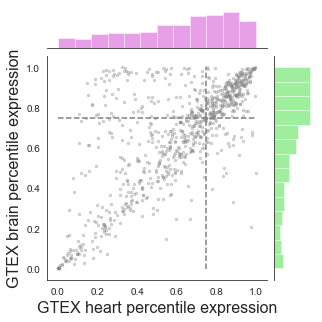

In [27]:

jp = sns.jointplot(x='heart_prank',y='brain_prank',data=gtex_multi_tissue_avg_prank.loc[ASD_CHD_genes],
             kind='scatter',alpha=.3,color='gray',joint_kws={'s':6},marginal_kws={'color':'white'},height=4.5)

plt.sca(jp.ax_marg_x)
sns.distplot(gtex_multi_tissue_avg_prank['heart_prank'].loc[ASD_CHD_genes].dropna().tolist(),color='#C410C4',kde=False)
plt.sca(jp.ax_marg_y)
sns.distplot(gtex_multi_tissue_avg_prank['brain_prank'].loc[ASD_CHD_genes].dropna().tolist(),color='#0ED50A',kde=False,vertical=True)

plt.sca(jp.ax_joint)
plt.xlabel('GTEX heart percentile expression',fontsize=16)
plt.ylabel('GTEX brain percentile expression',fontsize=16)
plt.plot([0,1],[.75,.75],'--',color='gray')
plt.plot([.75,.75],[0,1],'--',color='gray')


In [28]:
# write out brain/heart avg percentile rank for loading to cytoscape
# gtex_brain_heart_avg_prank.to_csv('gtex_brain_heart_avg_prank.csv') 

In [29]:
gtex_multi_tissue_avg_prank.loc[['SCN1A','SCN10A','SMARCA2']]

,heart_prank,brain_prank
Description,,
SCN1A,0.226035,0.735061
SCN10A,0.247308,0.074852
SMARCA2,0.916543,0.954075


In [30]:
min_brain_heart = gtex_multi_tissue_avg_prank[['brain_prank','heart_prank']].T.min()
min_brain_heart.head()

Description
A1BG       0.392525
A1CF       0.103832
A2M        0.965424
A2ML1      0.248575
A3GALT2    0.116501
dtype: float64

MannwhitneyuResult(statistic=5594934.5, pvalue=1.0524936607959146e-41)


/Users/brinrosenthal/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/brinrosenthal/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  import sys


(array([0. , 0.5, 1. , 1.5, 2. ]), <a list of 5 Text yticklabel objects>)

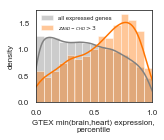

In [31]:
plt.figure(figsize=(2.08,1.69))
sns.distplot(min_brain_heart,bins=15,color='gray',label='all expressed genes')
sns.distplot(min_brain_heart.loc[ASD_CHD_genes].dropna(),bins=15,color='#FF7400',label='$z_{ASD-CHD}>3$')
plt.xlim([0,1])

from scipy.stats import mannwhitneyu
print(mannwhitneyu(min_brain_heart.tolist(),min_brain_heart.loc[ASD_CHD_genes].dropna().tolist()))

plt.legend(loc='upper left',fontsize=6,frameon=False)
plt.ylabel('density',fontsize=8)
plt.xlabel('GTEX min(brain,heart) expression,\npercentile',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
# plt.savefig('../../manuscript/figures_1911/Figure4/GTEX_min_brain_heart_dist.png',dpi=300,bbox_inches='tight')
# plt.savefig('../../manuscript/figures_1911/Figure4/GTEX_min_brain_heart_dist.svg',dpi=300,bbox_inches='tight')
# plt.savefig('../../manuscript/figures_1911/Figure4/GTEX_min_brain_heart_dist.pdf',dpi=300,bbox_inches='tight')